In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [40]:
neldermead = pd.read_pickle(".cache_3/nelder-mead-fdf.pkl")
bayesian = pd.read_pickle(".cache_3/bayesian.pkl")

models = ["polished-donkey-996", "polar-lake-997", "still-deluge-998"]
rl = pd.concat([pd.read_pickle(f".cache_3/{model}.pkl") for model in models])

In [41]:
evaluation = pd.concat([neldermead,bayesian,rl])

In [42]:
# Compute MAE
evaluation["delta_mu_x"] = np.abs(evaluation["mup_x"] - evaluation["mu_x"])
evaluation["delta_mu_y"] = np.abs(evaluation["mup_y"] - evaluation["mu_y"])
evaluation["delta_sigma_x"] = np.abs(evaluation["sigmap_x"] - evaluation["sigma_x"])
evaluation["delta_sigma_y"] = np.abs(evaluation["sigmap_y"] - evaluation["sigma_y"])
evaluation["mae"] = (evaluation["delta_mu_x"] + evaluation["delta_mu_y"] + evaluation["delta_sigma_x"] + evaluation["delta_sigma_y"]) / 4

In [43]:
leq30 = evaluation["step"] <= 30
opt = evaluation["model"].isin(["nelder-mead","bayesian"])

evaluation30 = evaluation[leq30 | opt]

In [44]:
finals = evaluation30.groupby(["model","problem"]).apply(lambda x: x.loc[x["step"].idxmax()])
finals = finals.drop(["model","problem"], axis=1).reset_index()

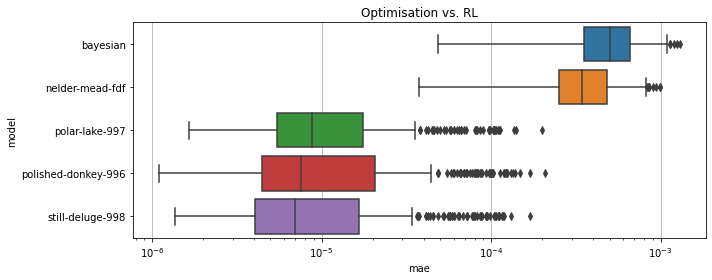

In [45]:
plt.figure(figsize=(10,4))
plt.title("Optimisation vs. RL")
sns.boxplot(x="mae", y="model", data=finals)
plt.xscale("log")
plt.gca().xaxis.grid()
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()